In [2]:
import numpy as np
from matplotlib import pyplot as plt

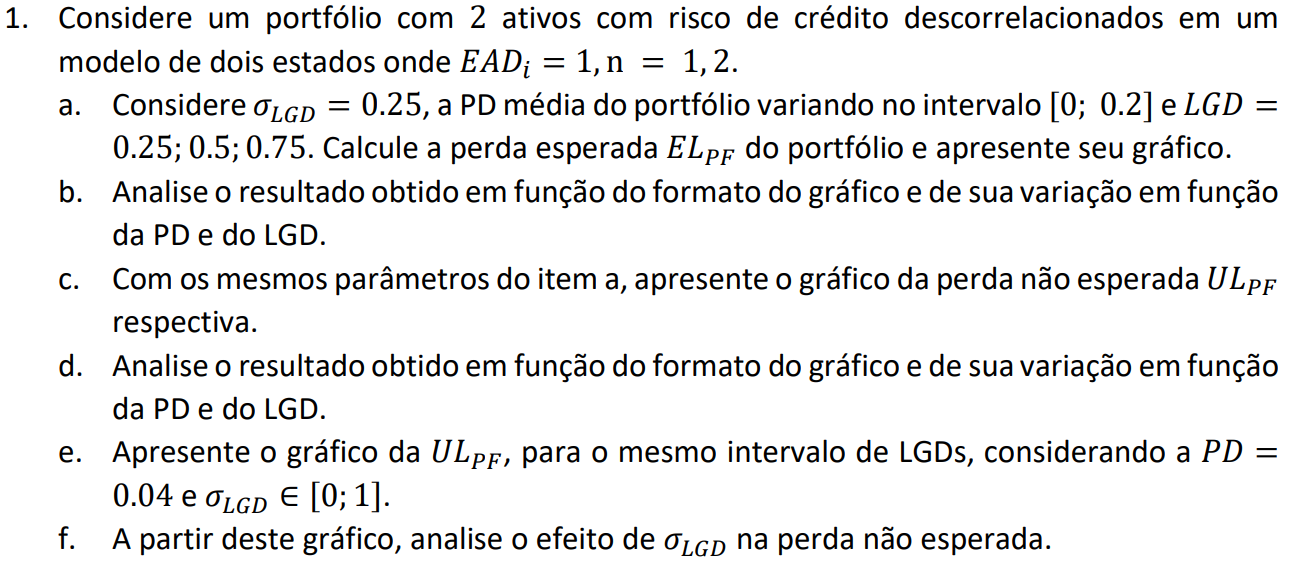

#### a

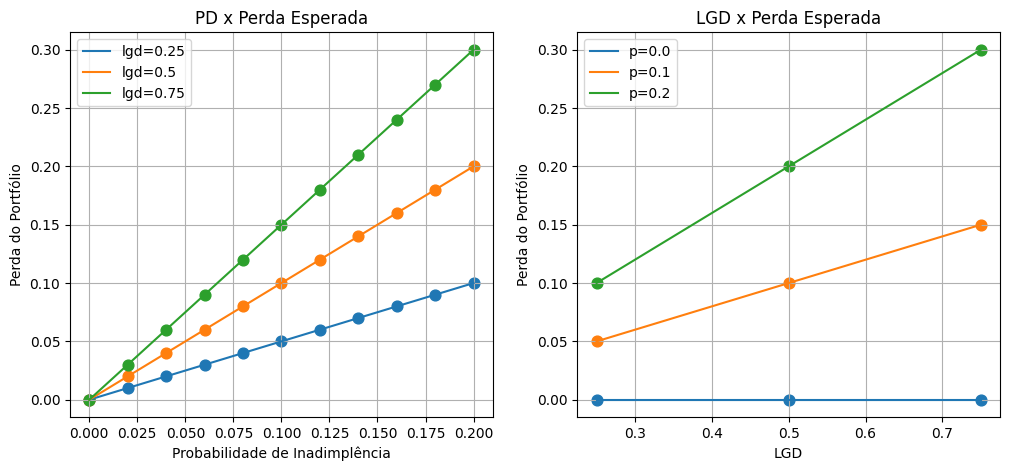

In [3]:
# a)

# Definindo as exposições no caso de inadimplência (Exposure at Default, EAD)
ead_1 = 1
ead_2 = 1

# Definindo a volatilidade das perdas em caso de inadimplência (Loss Given Default, LGD)
sigma_lgd = 0.25

# Definindo as probabilidades de inadimplência variando de 0 a 0.2 em 11 pontos
default_probs = np.linspace(0, 0.2, 11)

# Definindo diferentes valores de LGD
lgds = [0.25, 0.5, 0.75]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

for loss in lgds:
    losses = []
    for p in default_probs:
        # Calculando a perda do portfólio para cada probabilidade de inadimplência
        port_loss = p * loss * ead_1 + p * loss * ead_2
        losses.append(port_loss)
    ax1.scatter(default_probs, losses, s=60)
    ax1.plot(default_probs, losses, label=f'lgd={loss}')

ax1.grid()
ax1.set_ylabel('Perda do Portfólio')
ax1.set_xlabel('Probabilidade de Inadimplência')
ax1.set_title('PD x Perda Esperada')
_ = ax1.legend()

# Redefinindo as probabilidades de inadimplência variando de 0 a 0.2 em 3 pontos
default_probs = np.linspace(0, 0.2, 3)
for p in default_probs:
    losses = []
    for loss in lgds:
        # Calculando a perda do portfólio para cada valor de LGD
        port_loss = p * loss * ead_1 + p * loss * ead_2
        losses.append(port_loss)
    ax2.scatter(lgds, losses, s=60)
    ax2.plot(lgds, losses, label=f'p={p}')

ax2.grid()
ax2.set_ylabel('Perda do Portfólio')
ax2.set_xlabel('LGD')
ax2.set_title('LGD x Perda Esperada')
_ = ax2.legend()


#### b

Podemos observar que há uma relação linear entre a variação da perda esperada e a variação do LGD e da probabilidade de default, dado que 

$$
EL_{PF} = \sum{p_i *LGD_i *EAD_i}
$$

Como esperado, maiores valores de LGD (loss given default) levam a perdas esperadas maiores dado um nível de probabilidade de default

#### c

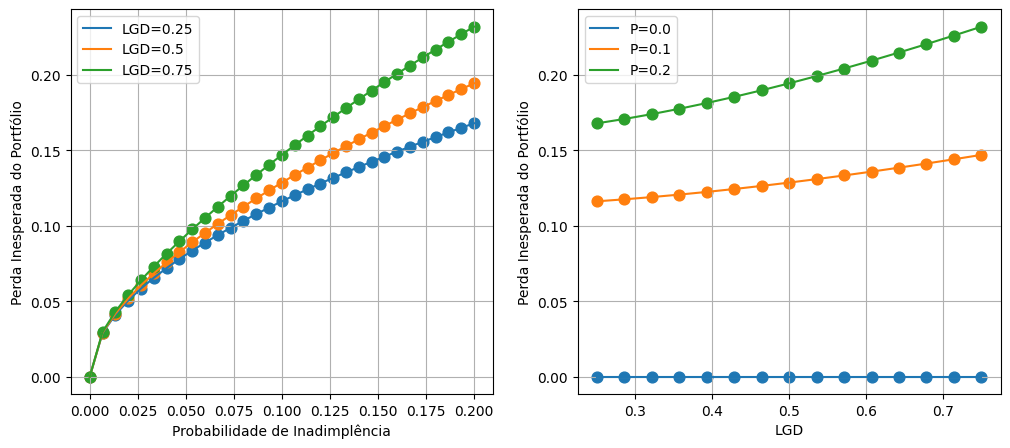

In [4]:
# Definindo as exposições no caso de inadimplência (EAD)
ead_1 = 1
ead_2 = 1

# Correlacionamento entre os empréstimos (rho)
rho = 0  # Não correlacionados

# Volatilidade das perdas em caso de inadimplência (LGD)
sigma_lgd = 0.25

# Definindo as probabilidades de inadimplência variando de 0 a 0.2 em 31 pontos
default_probs = np.linspace(0, 0.2, 31)

# Definindo diferentes valores de LGD
lgds = [0.25, 0.5, 0.75]

# Criando a figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Calculando e plotando o primeiro conjunto de dados (Probabilidade de Inadimplência vs. Perda Inesperada do Portfólio)
for loss in lgds:
    unexp_losses = []
    for p in default_probs:
        # Calculando a variância da probabilidade de inadimplência
        sigma_p = p * (1 - p)
        
        # Calculando a perda inesperada para cada exposição
        ul_1 = ead_1 * np.sqrt(p * sigma_lgd**2 + loss**2 * (sigma_p**2))
        ul_2 = ead_2 * np.sqrt(p * sigma_lgd**2 + loss**2 * (sigma_p**2))
        
        # Calculando a perda inesperada do portfólio
        port_ul = np.sqrt(ul_1**2 + ul_2**2 + 2 * rho * ul_1 * ul_2)
        unexp_losses.append(port_ul)
    
    ax1.scatter(default_probs, unexp_losses, s=60)
    ax1.plot(default_probs, unexp_losses, label=f'LGD={loss}')

# Configurações do primeiro subplot
ax1.grid()
ax1.set_ylabel('Perda Inesperada do Portfólio')
ax1.set_xlabel('Probabilidade de Inadimplência')
ax1.legend()

# Calculando e plotando o segundo conjunto de dados (LGD vs. Perda Inesperada do Portfólio)
default_probs = np.linspace(0, 0.2, 3)
lgds = np.linspace(0.25, 0.75, 15)

for p in default_probs:
    unexp_losses = []
    for loss in lgds:
        # Calculando a variância da probabilidade de inadimplência
        sigma_p = p * (1 - p)
        # Calculando a perda inesperada para cada exposição
        ul_1 = ead_1 * np.sqrt(p * sigma_lgd**2 + loss**2 * (sigma_p**2))
        ul_2 = ead_2 * np.sqrt(p * sigma_lgd**2 + loss**2 * (sigma_p**2))
        # Calculando a perda inesperada do portfólio
        port_ul = np.sqrt(ul_1**2 + ul_2**2 + 2 * rho * ul_1 * ul_2)
        unexp_losses.append(port_ul)
    ax2.scatter(lgds, unexp_losses, s=60)
    ax2.plot(lgds, unexp_losses, label=f'P={p}')

# Configurações do segundo subplot
ax2.grid()
ax2.set_ylabel('Perda Inesperada do Portfólio')
ax2.set_xlabel('LGD')
ax2.legend()

# Exibindo os subplots
plt.show()

#### d

$$
UL = EAD * \sqrt{p * \sigma_{lgd}^2 + LGD^2 * \sigma_p^2}
$$

A perda inesperada do portfólio com 2 ativos (descorrelacionados, $\rho = 0$)

$$
UL_{pf} = \sqrt{UL_{1}^2 + UL_{1}^2 + \rho * UL_1 * UL_2} = UL_{pf} = \sqrt{UL_{1}^2 + UL_{1}^2}
$$

Podemos observar que a perda inesperada UL se relaciona com a raiz quadrada de $p$, e tem uma relação quadrática com a LGD para o caso dos ativos descorrelacionados

#### e

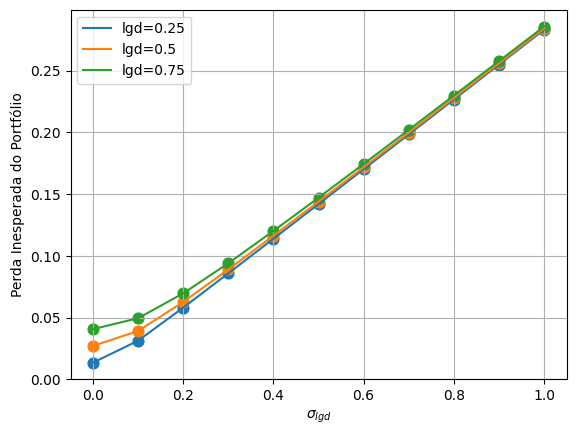

In [5]:
# e

# Definição das exposições no caso de inadimplência (EAD)
ead_1 = 1
ead_2 = 1

# Correlação entre os empréstimos (rho)
rho = 0  # Não correlacionados

# Lista de valores para a volatilidade das perdas em caso de inadimplência (LGD)
sigma_lgd_list = np.linspace(0, 1, 11)

# Probabilidade de inadimplência
p = 0.04

# Lista de diferentes valores de LGD
lgds = [0.25, 0.5, 0.75]

# Loop sobre os valores de LGD
for loss in lgds:
    unexp_losses = []
    # Loop sobre os valores de volatilidade das perdas em caso de inadimplência (LGD)
    for sigma_lgd in sigma_lgd_list:
        # Cálculo da variância da probabilidade de inadimplência
        sigma_p = p*(1-p)
        # Cálculo da perda inesperada para cada exposição
        ul_1 = ead_1*np.sqrt(p*sigma_lgd**2 + loss**2 * (sigma_p**2))
        ul_2 = ead_2*np.sqrt(p*sigma_lgd**2 + loss**2 * (sigma_p**2))
        # Cálculo da perda inesperada do portfólio
        port_ul = np.sqrt(ul_1**2 + ul_2**2 + 2*rho*ul_1*ul_2)
        unexp_losses.append(port_ul)
    # Plotagem dos pontos e da linha para cada valor de LGD
    plt.scatter(sigma_lgd_list, unexp_losses, s=60)
    plt.plot(sigma_lgd_list, unexp_losses, label=f'lgd={loss}')

# Configurações do gráfico
plt.grid()
plt.ylabel('Perda Inesperada do Portfólio')
plt.xlabel('$\sigma_{lgd}$')
_ = plt.legend()
plt.show()

#### f

Conforme $\sigma_{lgd}$ fica maior e domina a equação de perda não esperada, esta converge para o valor de 0.2., e a perda inesperada do portfolio converge para 0.28. 

Curiosamente, conforme a volatilidade da LGD aumenta, a incerteza sobre a perda inesperada diminui.

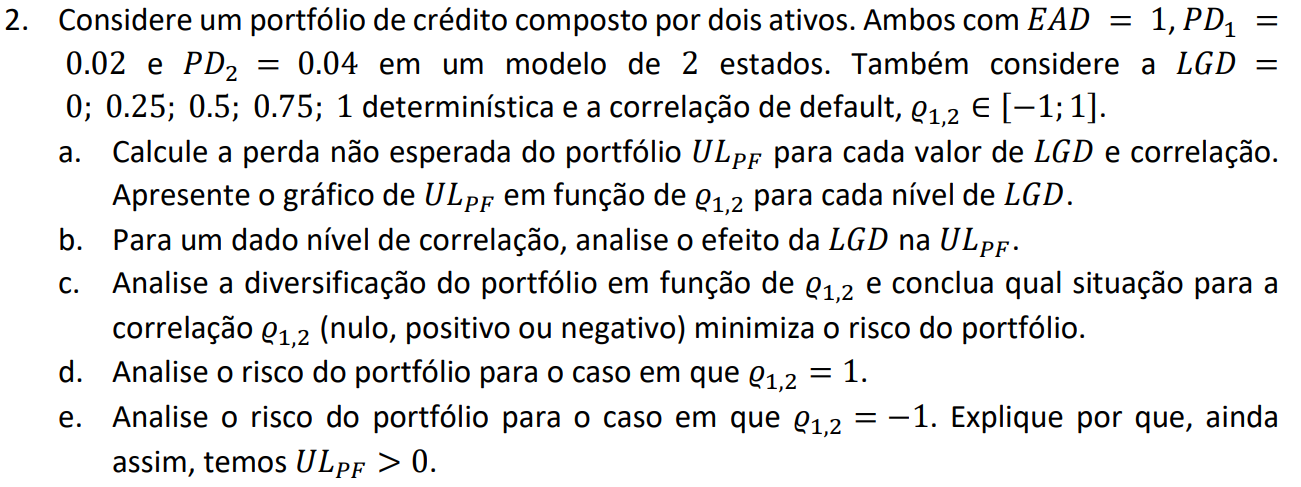

#### a)

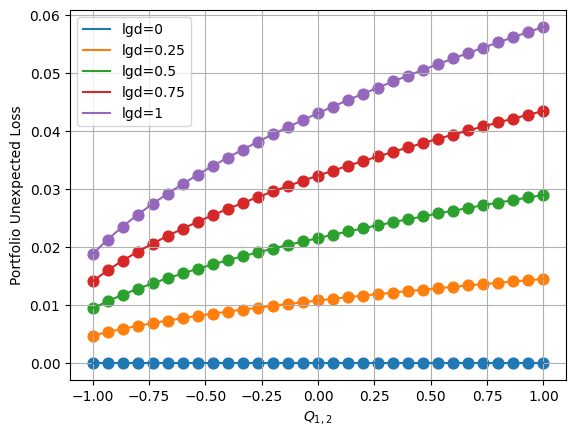

In [6]:
# a)
ead_1 = 1
ead_2 = 1

pd_1 = 0.02
pd_2 = 0.04

lgds = [0, 0.25, 0.5, 0.75, 1]
sigma_lgd = 0

rho_list = np.linspace(-1, 1, 31)

for loss in lgds:
    unexp_losses = []
    for rho in rho_list:

        sigma_p_1 = pd_1*(1-pd_1)
        sigma_p_2 = pd_2*(1-pd_2)
        
        ul_1 = ead_1*np.sqrt(pd_1*sigma_lgd**2 + loss**2 * (sigma_p_1**2))
        ul_2 = ead_2*np.sqrt(pd_2*sigma_lgd**2 + loss**2 * (sigma_p_2**2))
        
        port_ul = np.sqrt(ul_1**2 + ul_2**2 + 2*rho*ul_1*ul_2)
        unexp_losses.append(port_ul)
        
    plt.scatter(rho_list, unexp_losses, s=60)
    plt.plot(rho_list, unexp_losses, label=f'lgd={loss}')

plt.grid()
plt.ylabel('Portfolio Unexpected Loss')
plt.xlabel('$Q_{1,2}$')

_ = plt.legend()
plt.show()

#### b)


Se os ativos tivessem o mesmo EAD, uma correlação de -1 significaria um hedge perfeito e a perda inesperada do portfolio seria de 0. Como este não é o caso, para um dado nível de correlação, a perda inesperada aumenta conforme se aumenta a LGD.

E quanto maior a correlação entre os ativos, maior este efeito.

#### c)

A correlação negativa entre os ativos minimiza a perda inesperada, e chega a ficar zerada caso os EAD dos ativos sejam iguais e a correlação perfeitamente negativa.

#### d)

O risco do portfolio é maior conforme a correlação dos defaults aumenta, e tem o valor máximo para cada LGD em $Q_{1,2}$=1

#### e)

O risco é minimizado em caso de correlação negativa perfeita. Neste caso, como os EADs são diferentes, ainda há um risco no portfolio que não é coberto pelo hedge.

## Q3

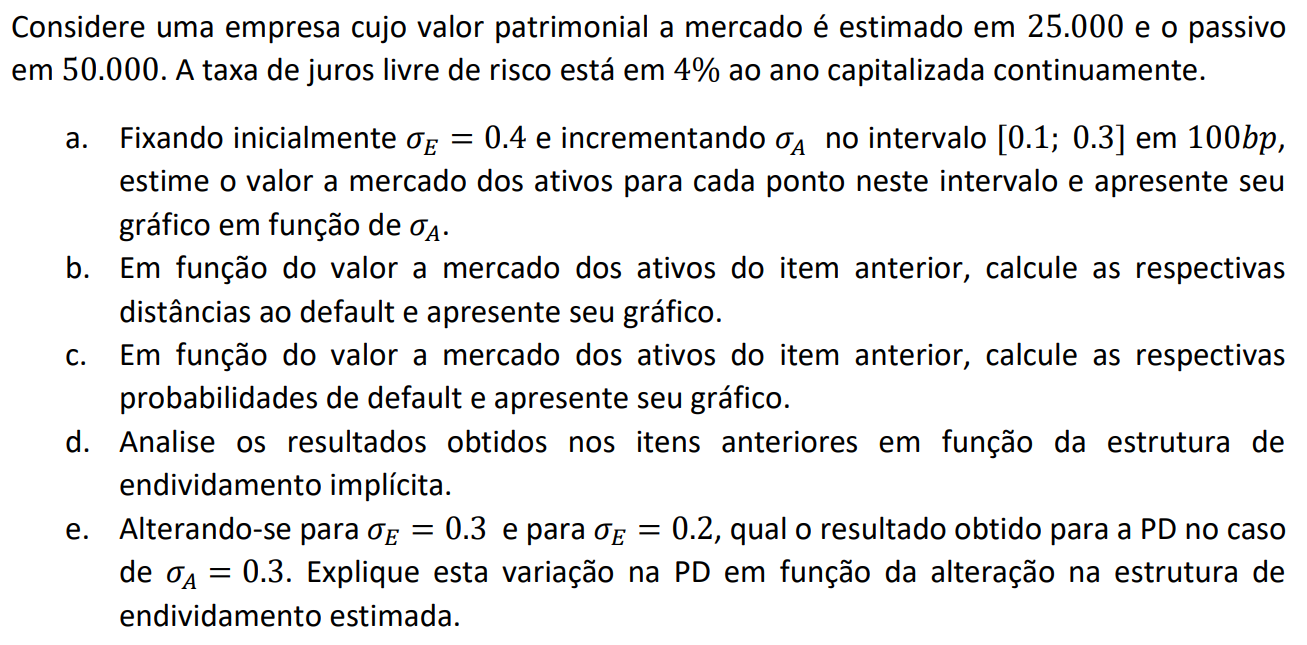

In [7]:
from scipy.optimize import newton
from scipy.stats import norm

def find_asset_value(sigma_E, L, T, r, sigma_A, E_t, mu, initial_guess=100):
    """
    Resolve o valor dos ativos da empresa (A_t) dado sigma_E utilizando o método de Newton-Raphson.

    Parâmetros:
    sigma_E (float): Volatilidade implícita do patrimônio líquido.
    L (float): Valor nominal da dívida da empresa (passivos) com vencimento em T.
    T (float): Tempo até o vencimento da dívida (em anos).
    r (float): Taxa de juros livre de risco (anualizada).
    sigma_A (float): Volatilidade do valor dos ativos da empresa (anualizada).
    E_t (float): Valor de mercado atual do patrimônio líquido da empresa.
    mu (float): Retorno esperado dos ativos da empresa (anualizado).
    initial_guess (float): Valor inicial estimado para os ativos da empresa.

    Retorna:
    float: Valor estimado dos ativos da empresa (A_t).
    """
    
    def equation_to_solve(A_t):
        d1 = (np.log(A_t / L) + T * (r + sigma_A**2 / 2)) / (sigma_A * np.sqrt(T))
        d2 = d1 - sigma_A * np.sqrt(T)
        N_d1 = norm.cdf(d1)
        y = ((sigma_A * N_d1 * A_t) / E_t) - sigma_E
        return y
    
    A_t = newton(equation_to_solve, initial_guess)
    
    # merton model
    d1 = (np.log(A_t / L) + T * (r + sigma_A**2 / 2)) / (sigma_A * np.sqrt(T))
    d2 = d1 - sigma_A * np.sqrt(T)
    
    sigma_E = (sigma_A * norm.cdf(d1) * A_t) / E_t
    
    dd = (np.log(A_t) + (mu - sigma_A**2 / 2) * T - np.log(L)) / (sigma_A * np.sqrt(T))
    pd = norm.cdf(-dd)
    
    return A_t, dd, pd

#### a-c)

Sigma_a: 0.10 | Valor dos ativos (A_t): 100000 | dd: 6.9 | pd: 3e-12
Sigma_a: 0.11 | Valor dos ativos (A_t): 90909 | dd: 5.4 | pd: 3.7e-08
Sigma_a: 0.12 | Valor dos ativos (A_t): 83333 | dd: 4.2 | pd: 1.4e-05
Sigma_a: 0.13 | Valor dos ativos (A_t): 76932 | dd: 3.2 | pd: 0.00058
Sigma_a: 0.14 | Valor dos ativos (A_t): 71555 | dd: 2.5 | pd: 0.0064
Sigma_a: 0.15 | Valor dos ativos (A_t): 67340 | dd: 1.9 | pd: 0.028
Sigma_a: 0.16 | Valor dos ativos (A_t): 64327 | dd: 1.5 | pd: 0.067
Sigma_a: 0.17 | Valor dos ativos (A_t): 62200 | dd: 1.2 | pd: 0.12
Sigma_a: 0.18 | Valor dos ativos (A_t): 60617 | dd: 0.98 | pd: 0.16
Sigma_a: 0.19 | Valor dos ativos (A_t): 59361 | dd: 0.81 | pd: 0.21
Sigma_a: 0.20 | Valor dos ativos (A_t): 58312 | dd: 0.67 | pd: 0.25
Sigma_a: 0.21 | Valor dos ativos (A_t): 57399 | dd: 0.55 | pd: 0.29
Sigma_a: 0.22 | Valor dos ativos (A_t): 56579 | dd: 0.45 | pd: 0.33
Sigma_a: 0.23 | Valor dos ativos (A_t): 55827 | dd: 0.36 | pd: 0.36
Sigma_a: 0.24 | Valor dos ativos (A_t): 5

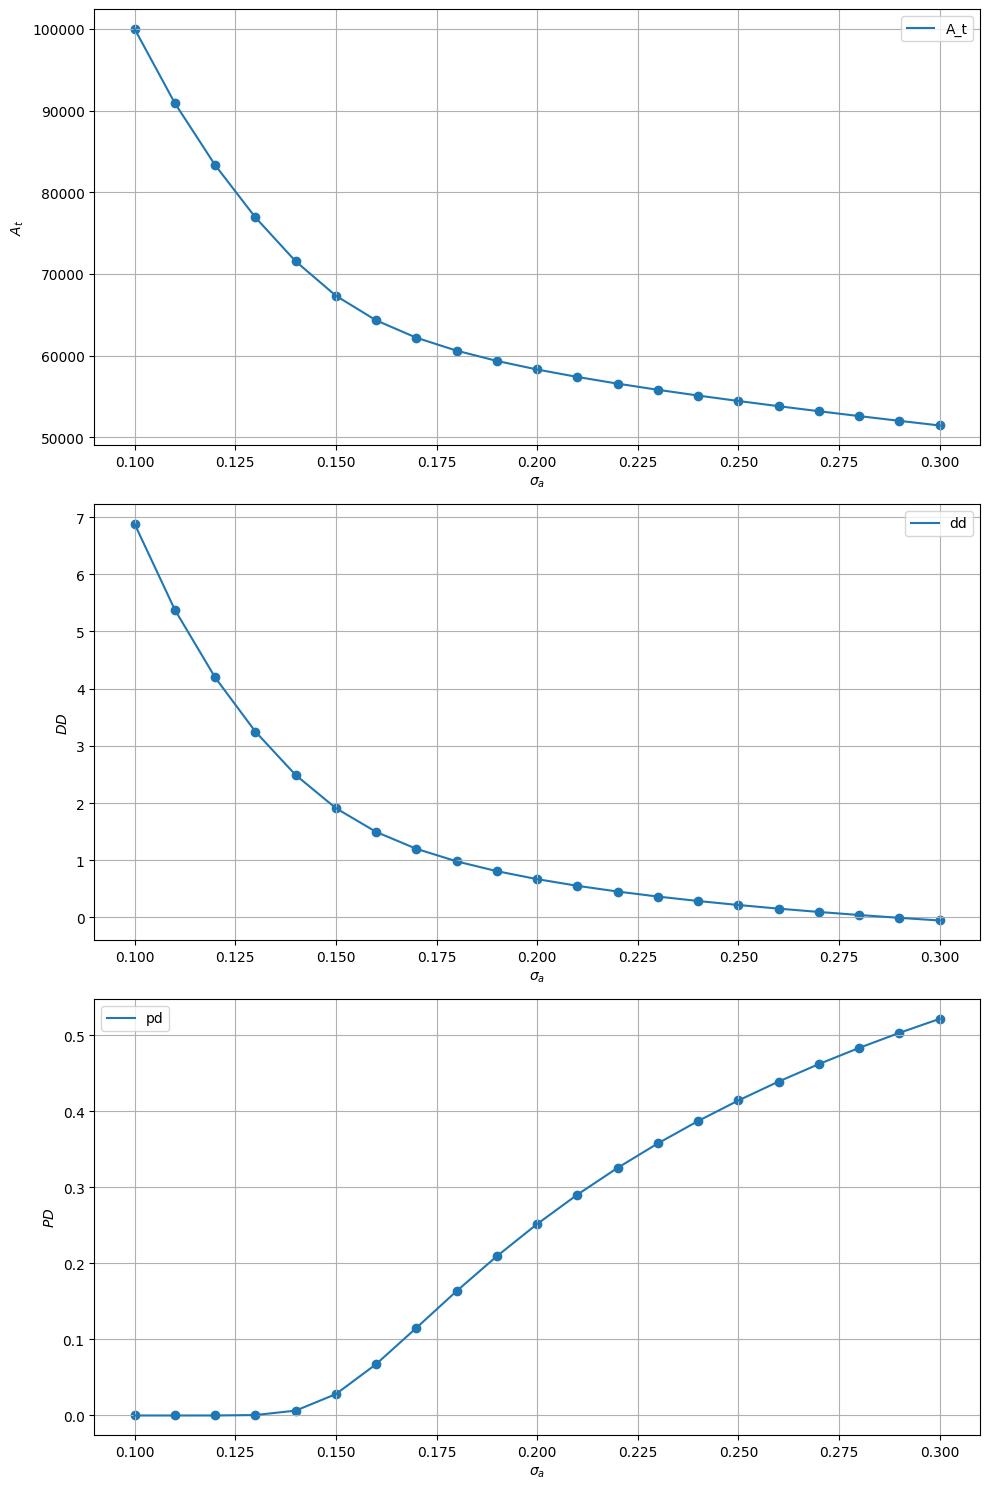

In [11]:
# a)
L = 50_000     # Example debt value
T = 1      # 1 year to maturity
r = 0.04   # 5% risk-free rate
mu = 0.0   # 0% expected return on assets
E_t = 25_000   # Example equity value

sigma_E = 0.4 # sigma 3

A_t = []
dd = []
pd = []

sigma_a_range = np.arange(0.1, 0.31, 0.01)

for sigma_a in sigma_a_range:
    A_t_estimated, dd_estimated, pd_estimated = find_asset_value(sigma_E, L, T, r, sigma_a, E_t, mu, initial_guess=132_000)
    A_t.append(A_t_estimated)
    dd.append(dd_estimated)
    pd.append(pd_estimated)
    
    print(f"Sigma_a: {sigma_a :.2f} | Valor dos ativos (A_t): {A_t_estimated :.0f} | dd: {dd_estimated :.2} | pd: {pd_estimated :.2}")

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

ax1.plot(sigma_a_range, A_t, label=f'A_t')
ax1.scatter(sigma_a_range, A_t)
ax1.set_xlabel('$\sigma_a$')
ax1.set_ylabel('$A_t$')
ax1.grid()
ax2.plot(sigma_a_range, dd, label=f'dd')
ax2.scatter(sigma_a_range, dd)
ax2.set_xlabel('$\sigma_a$')
ax2.set_ylabel('$DD$')
ax2.grid()
ax3.plot(sigma_a_range, pd, label=f'pd')
ax3.scatter(sigma_a_range, pd)
ax3.set_xlabel('$\sigma_a$')
ax3.set_ylabel('$PD$')
ax3.grid()
plt.tight_layout()
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

#### d)

Conforme há um aumento na variância do valor dos ativos, há uma subsequente desvalorização na precificação destes ativos. Dada a estrutura de endividamento, isso causa a diminuição da distância ao default, aumentando a probabilidade de default.

#### e)

In [12]:
L = 50_000     # Example debt value
T = 1      # 1 year to maturity
r = 0.04   # 5% risk-free rate
mu = 0.0   # 10% expected return on assets
E_t = 25_000   # Example equity value

sigma_E = 0.3 # sigma 3
sigma_A = 0.4

A_t = []
dd = []
pd = []

A_t_estimated, dd_estimated, pd_estimated = find_asset_value(sigma_E, L, T, r, sigma_A, E_t, mu, initial_guess=100_000)
print(f'{sigma_E = :.2f} | {A_t_estimated = :.0f} | {pd_estimated = :.2f}')

sigma_E = 0.2 # sigma 3
A_t_estimated, dd_estimated, pd_estimated = find_asset_value(sigma_E, L, T, r, sigma_A, E_t, mu, initial_guess=100_000)
print(f'{sigma_E = :.2f} | {A_t_estimated = :.0f} | {pd_estimated = :.2f}')

sigma_E = 0.30 | A_t_estimated = 42014 | pd_estimated = 0.74
sigma_E = 0.20 | A_t_estimated = 37374 | pd_estimated = 0.82


Podemos perceber que, dado um valor de $\sigma_e$ menor, e com $\sigma_a$ fixo, há uma valoração menor dos ativos, o que aumenta a probabilidade de default $pd$

Isso acontece, matematicamente, porque

$$
\sigma_e =  \frac{\sigma_A * \cal N(d1) * A_t}{E_t}
$$

Se $sigma_a$ e $E_t$ são fixos, então $\sigma_e$ é diretamente proporcional a $A_t$ (já que $\cal N(d1)$ também é proporcional a $A_t$). Ou seja, ao diminuir $\sigma_e$, diminui-se também $A_t$, diminuindo a distância do default, aumentando a probabilidade de default